决策树学习算法的基本步骤如下：

开始： 将所有的训练样本都分配给根节点。

节点分析： 对于每个节点：

如果该节点的样本都属于同一类别，将该节点标记为叶子节点，表示分类的结果。
如果样本包含多个类别，则进行分裂。
特征选择： 选择一个特征，将样本分成不同的子集。选择的特征应该能够最好地区分样本的类别。

子节点创建： 为每个子集创建一个子节点，并将相应的样本分配给这些子节点。

递归： 对每个子节点重复步骤2，直到满足停止条件（例如达到最大深度、样本数量过小等）。

使用决策树模型对未知样本进行分类的过程如下：

准备模型： 首先，你需要已经构建好的决策树模型，该模型是通过训练数据构建的。

获取未知样本： 获得包含未知样本的数据。这些未知样本的特征应该与用于训练决策树的样本的特征相同。

从根节点开始： 将未知样本从根节点开始通过决策树进行遍历。

根据节点的判定条件： 在每个节点上，根据节点的判定条件（特征和阈值）将样本分配到相应的子节点。这个过程一直持续，直到到达叶子节点。

叶子节点的类别： 达到叶子节点后，该叶子节点的类别即为模型预测的未知样本的类别。

In [15]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  accuracy_score

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
# 寸法(X)と品種(y)を取り出しておく
iris_X = iris.data
iris_y = iris.target

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(iris_X,iris_y, test_size = 0.3, random_state=0)

In [17]:
# モジュールのインポート
from sklearn.tree import DecisionTreeClassifier, plot_tree
# 学習（基準をエントロピーとして，深さ3まで）
iris_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)#entropy为信息
iris_tree.fit(X_train, y_train)
y_pred=iris_tree.predict((X_test))
accuracy_score(y_test,y_pred)

0.9777777777777777

[Text(0.375, 0.875, 'petal width (cm) <= 0.75\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.625, 'petal length (cm) <= 4.95\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.25, 0.375, 'petal width (cm) <= 1.65\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'petal length (cm) <= 5.05\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

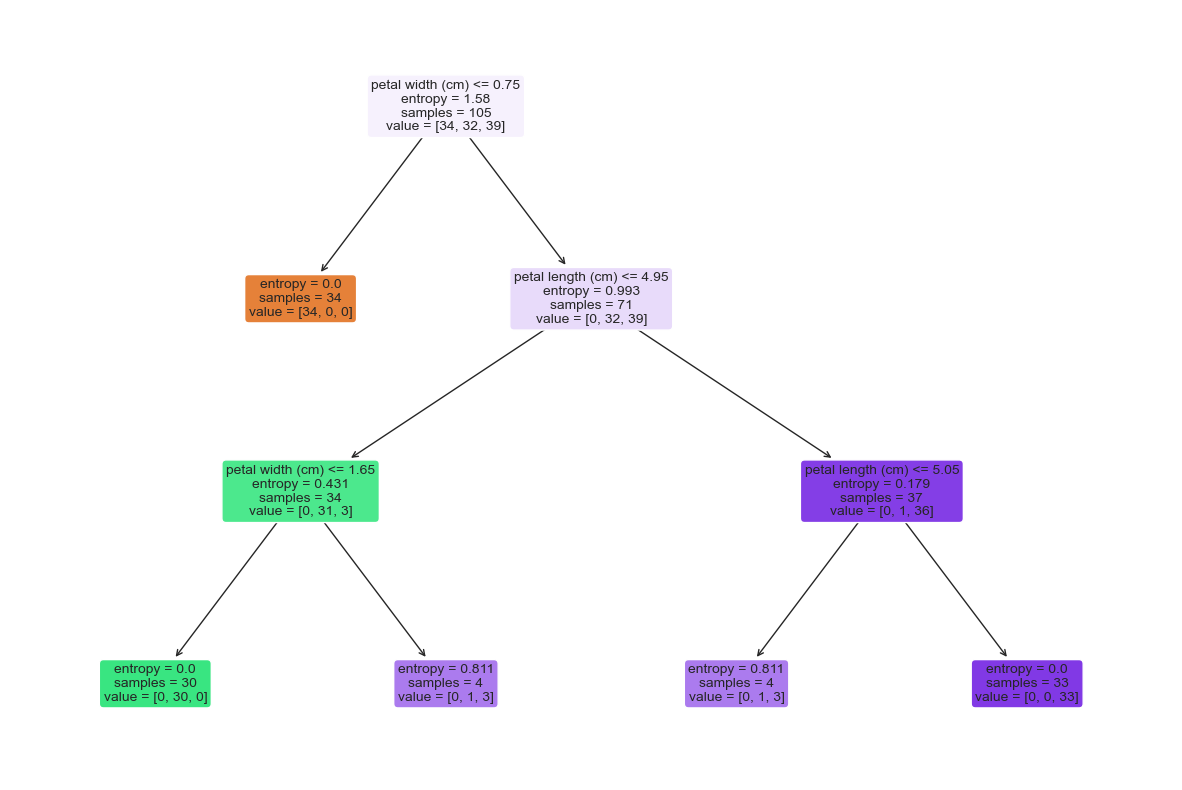

In [18]:
plt.figure(figsize=(15, 10))
plot_tree(iris_tree, filled=True, feature_names=iris.feature_names, rounded=True, fontsize=10)

![Alt Text](Dic/Dec1.png)
![Alt Text](Dic/Dec2.png)

<font size="10" color='red'>決定木の学習上の問題</font>
## データ自体の問題
– 連続値の変数 適度な離散化が必要
– 欠損値  補間などが必要
## 過学習（overfitting）
– 学習データに適合しすぎた，複雑すぎるモデル 未知のデータに対する性能がかえって低下
– 決定木は（詳細にしすぎることで）過学習しやすい
– 「オッカムの剃刀」（Occam’s razor）
モデルの能力が同程度なら，より単純なものを選ぶという考え方

# 枝刈り
• DecisionTreeClassifierのパラメータ
– max_depth 木の高さ（深さ）の上限
– min_samples_split 分割時の最小サンプル数
– min_samples_leaf 末端（葉）の最小サンプル数
– max_leaf_nodes 末端（葉）の数の上限
– ccp_alpha コスト複雑度枝刈りの制御
– 他にもあります

In [19]:
#增大min_samples_leaf的值可能会导致更简单的树结构，有助于防止过拟合，这里树就由于叶节点最少需要5个样本而无法再分类下去
iris_tree2 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5, random_state=0)
iris_tree2.fit(X_train, y_train)
y_pred1=iris_tree2.predict((X_test))
accuracy_score(y_test,y_pred1)

0.9111111111111111

# kNN-最近傍法
距離に基づく手法であるため，次の点に留意する
– 距離の定義（典型的にはユークリッド距離）
– 変数の値はそれぞれ独自の尺度なので正規化が必要
– カテゴリカルな変数では，距離を計算可能な形にする
• また，学習データをそのまま代表点に用いるため，
– 学習データのサンプル数が多いと計算に時間がかかる
（すべてのサンプルについて計算する）
– 外れ値（ノイズ）の影響を受けやすい
 k-NN法である程度回避できるが，k-NN法もやはり
 時間がかかるという問題がある

In [20]:
from sklearn.neighbors import KNeighborsClassifier

iris_knn = KNeighborsClassifier(n_neighbors=3)
iris_knn.fit(X_train, y_train)
iris_knn_pre = iris_knn.predict(X_test)
iris_knn.score(X_test, y_test)

0.9777777777777777

# Regression Tree

In [21]:
# データの読み込み
cars = pd.read_csv("cars.csv", index_col=0)
# 整形（xを配列の配列にする必要がある）
cars_x = np.array(cars.speed).reshape(-1,1)#目的是将一维数组（或向量）转换为二维数组，其中行数是自动计算的，而列数是1。这通常用于处理单特征的机器学习模型中，因为大多数机器学习库中的模型期望输入是二维数组。
cars_y = np.array(cars.dist)
# データの確認
cars_x

array([[ 4],
       [ 4],
       [ 7],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [10],
       [10],
       [11],
       [11],
       [12],
       [12],
       [12],
       [12],
       [13],
       [13],
       [13],
       [13],
       [14],
       [14],
       [14],
       [14],
       [15],
       [15],
       [15],
       [16],
       [16],
       [17],
       [17],
       [17],
       [18],
       [18],
       [18],
       [18],
       [19],
       [19],
       [19],
       [20],
       [20],
       [20],
       [20],
       [20],
       [22],
       [23],
       [24],
       [24],
       [24],
       [24],
       [25]], dtype=int64)

In [22]:
from sklearn.tree import DecisionTreeRegressor
# 学習（二乗誤差基準として，深さ3まで）
cars_tree_reg = DecisionTreeRegressor(criterion='squared_error',max_depth=3, random_state=0)
cars_tree_reg.fit(cars_x, cars_y)

DecisionTreeRegressor(max_depth=3, random_state=0)

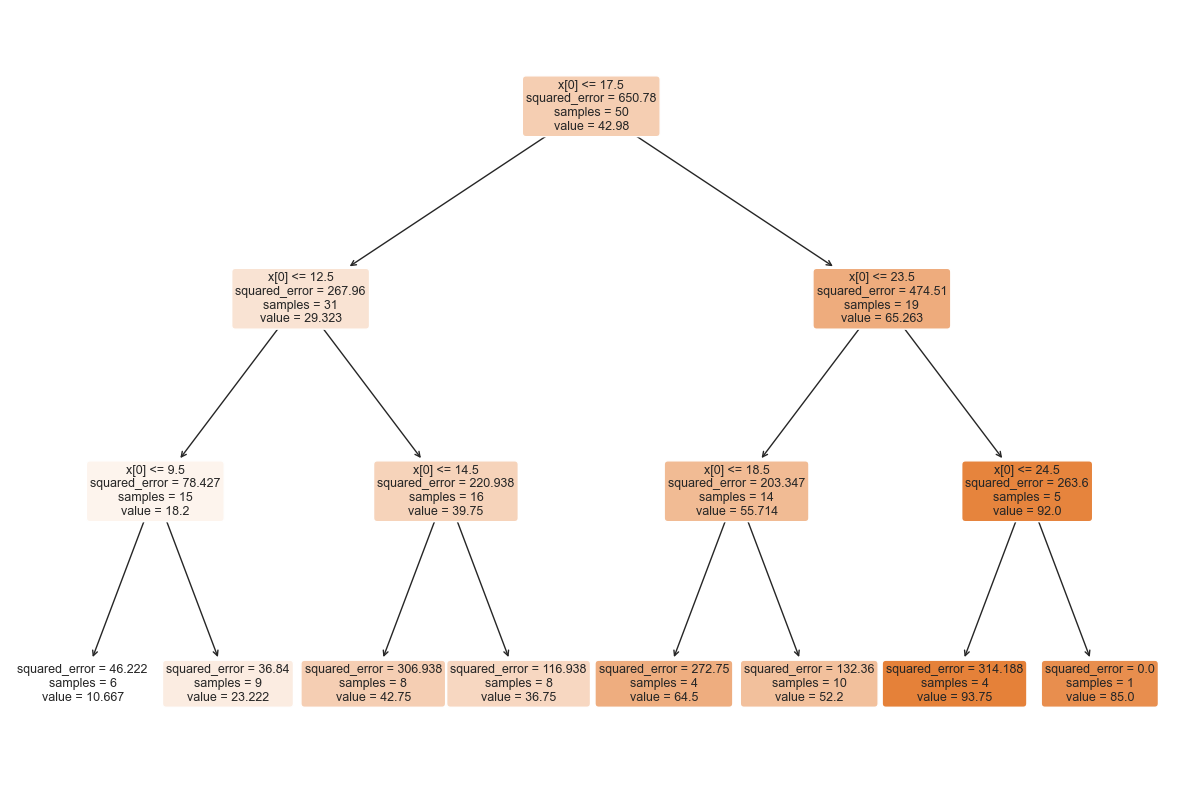

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(cars_tree_reg, filled=True, rounded=True)
plt.show()

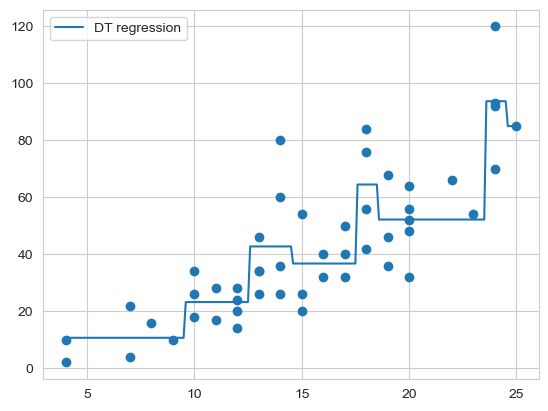

In [27]:
# cars_x の範囲を細かく区切ってプロットデータ作成
X0 = np.arange(cars_x.min(), cars_x.max(), 0.1)
X = X0.reshape(-1,1)
# このデータについてそれぞれ予測
Yt = cars_tree_reg.predict(X)
plt.scatter(cars.speed, cars.dist)
plt.plot(X, Yt, label='DT regression')
plt.legend(loc='upper left')

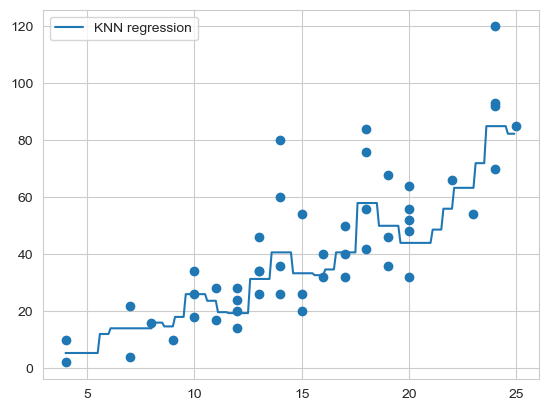

In [28]:
from sklearn.neighbors import KNeighborsRegressor

cars_knn_reg = KNeighborsRegressor(n_neighbors=3)
cars_knn_reg.fit(cars_x, cars_y)
# 回帰木と同様に予測
Yk = cars_knn_reg.predict(X)
plt.scatter(cars.speed, cars.dist)
plt.plot(X, Yk, label='KNN regression')
plt.legend(loc='upper left')

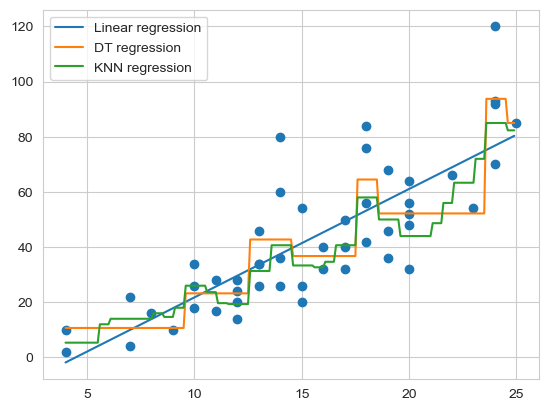

In [29]:
from scipy import stats
cars_reg = stats.linregress(cars)
Yl = cars_reg.slope * X0 + cars_reg.intercept
plt.scatter(cars.speed, cars.dist)
plt.plot(X, Yl, label='Linear regression')
plt.plot(X, Yt, label='DT regression')
plt.plot(X, Yk, label='KNN regression')
plt.legend(loc='upper left')